## **Business Case**

### **Client context:**
The client is a rapidly growing retail business specializing in a diverse range of products, including Electronics, Clothing, Home essentials, Beauty products, and Sports gear. They operate through multiple purchase channels, such as online platforms, physical stores, and mobile apps. The client is committed to enhancing customer satisfaction while driving sales and profitability.
Their leadership team aims to better understand customer behaviour, optimize marketing strategies, and identify high-value opportunities to maintain a competitive edge in the market.

### **Business Problem:**
The client seeks to leverage data-driven insights to optimize sales, enhance customer satisfaction, and improve profitability. By analysing customer behaviour, purchase trends, and product performance across platforms.

In [2]:
import pandas as pd

# Load the Excel/CSV file - raw data file

customers_df = pd.read_csv("data/customers_df.csv")
customers_df

,TransactionID,CustomerID,Purchase_Channel,Product_Category,Purchase_Amount,Quantity,Purchase_Date,Platform,Age,Gender,Education,Marital_Status
0,1,CUST1011,App,Electronics,246.72,5.0,2023-01-01,App,62.0,Female,PhD,Married
1,2,CUST1222,Store,Beauty,412.10,4.0,2023-01-02,App,52.0,Female,PhD,Divorced
2,3,CUST1105,Store,Beauty,430.15,4.0,2023-01-03,In-Store,55.0,Male,PhD,Widow
3,4,CUST1211,Online,Electronics,304.72,3.0,2023-01-04,App,40.0,Male,PhD,Divorced
4,5,CUST1262,Online,Electronics,405.39,2.0,2023-01-05,In-Store,47.0,Female,Basic,Divorced
...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,CUST1210,App,Sports,36.90,3.0,2024-08-18,Web,33.0,Male,Graduate,Married
596,597,CUST1028,Store,Sports,203.36,3.0,2024-08-19,In-Store,49.0,Male,Basic,Single
597,598,CUST1241,Online,Electronics,245.39,3.0,2024-08-20,In-Store,56.0,Female,Basic,Married
598,599,CUST1198,App,Home,122.68,1.0,2024-08-21,Web,31.0,Male,PhD,Widow


### Analyze the monthly purchase trends across platforms:

Question 1: 

- 1a. Group the dataset by month and Platform to calculate the total Purchase_Amount for each platform.

- 1b. Create a multi-line chart showing the monthly Purchase_Amount trends for each platform (Web, App, In-Store).

- 1c. Add appropriate axis labels, a legend, and markers for better readability.

In [11]:
# convert 'Date' datatype to datetime format
customers_df['Purchase_Date'] = pd.to_datetime(customers_df['Purchase_Date'], errors='coerce')

# Extract the month from Date
customers_df['Month'] = customers_df['Purchase_Date'].dt.to_period('M') 
customers_df.head(2)

,TransactionID,CustomerID,Purchase_Channel,Product_Category,Purchase_Amount,Quantity,Purchase_Date,Platform,Age,Gender,Education,Marital_Status,Month
0,1,CUST1011,App,Electronics,246.72,5.0,2023-01-01,App,62.0,Female,PhD,Married,2023-01
1,2,CUST1222,Store,Beauty,412.10,4.0,2023-01-02,App,52.0,Female,PhD,Divorced,2023-01


In [12]:
# 1a. Group the dataset by month and Platform to calculate the total Purchase_Amount for each platform.
# Transforming the data
monthly_platform_sales = customers_df.groupby(['Month', 'Platform'])['Purchase_Amount'].sum().unstack()
monthly_platform_sales

Platform,App,In-Store,Web
Month,,,
2023-01,4968.606949,2383.120476,1246.430000
2023-02,2960.660000,2316.300000,1881.270000
2023-03,3367.450000,1489.030000,2767.662222
2023-04,1066.800000,2878.948224,2639.840000
2023-05,2355.500000,3531.750000,1547.620000
2023-06,3737.938224,2935.230000,1713.390000
2023-07,1960.190000,2615.258872,3373.092222
2023-08,3944.168224,1945.790000,1727.010000
2023-09,2141.338396,3159.129171,3118.312123


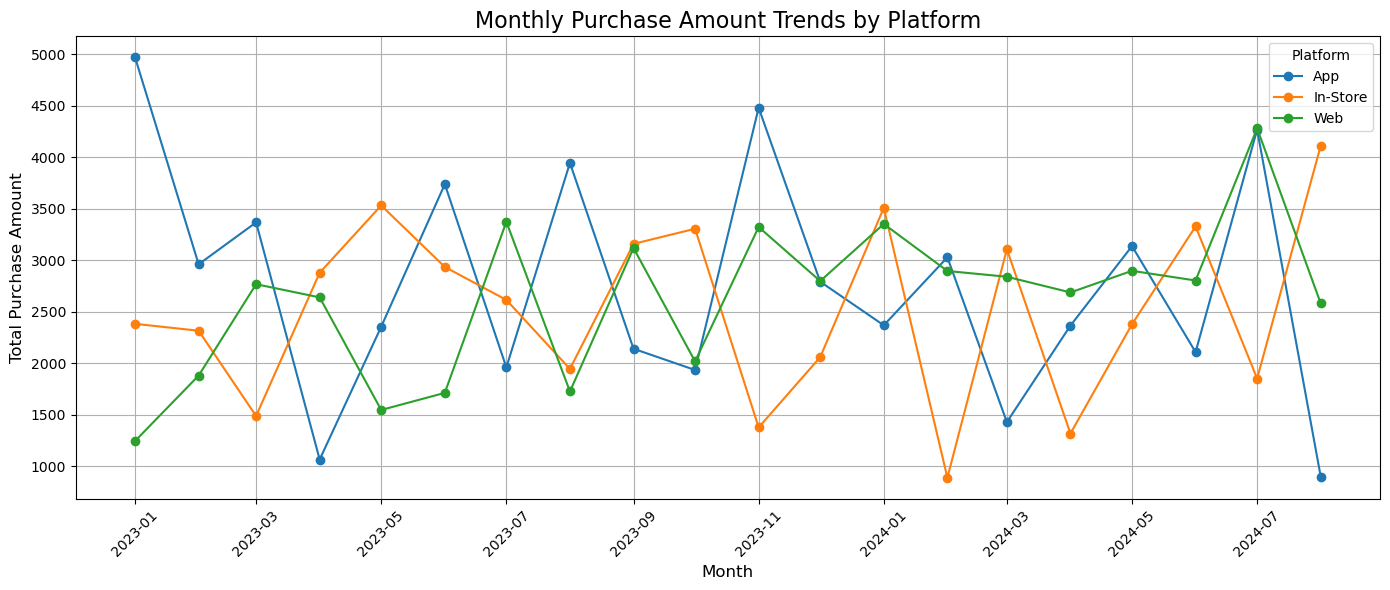

In [13]:
# 1b. Create a multi-line chart showing the monthly Purchase_Amount trends for each platform (Web, App, In-Store).
# 1c. Add appropriate axis labels, a legend, and markers for better readability.

import matplotlib.pyplot as plt

# Plotting the multi-line chart
plt.figure(figsize=(14, 6))

# Plot each platform's line
for platform in monthly_platform_sales.columns:
     plt.plot(monthly_platform_sales.index.to_timestamp(), monthly_platform_sales[platform], label=platform, marker='o')
     # see explanation in markdown cell below after chart VS trainer's answer

# Add labels and title
plt.title('Monthly Purchase Amount Trends by Platform', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Purchase Amount', fontsize=12)
plt.legend(title='Platform', loc='upper right', fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Perform a comparative analysis of customer spending across different platforms:


Question 2:

- 2a. Group transactions by Platform (Web, App, In-Store) and Product_Category.

- 2b. Calculate the total Purchase_Amount for each combination of Platform and Product_Category.

- 2c. Create a stacked bar chart to visualize the total Purchase_Amount for each platform, with bars segmented by Product_Category.

In [9]:
# 2a. Group transactions by Platform (Web, App, In-Store) and Product_Category.
# 2b. Calculate the total Purchase_Amount for each combination of Platform and Product_Category.
platform_category = customers_df.groupby(['Platform', 'Product_Category'])['Purchase_Amount'].sum().unstack()
platform_category

Product_Category,Beauty,Clothing,Electronics,Home,Sports
Platform,,,,,
App,15682.923898,10900.715189,6694.080476,8767.462897,13273.380000
In-Store,8332.286949,8369.426792,10461.711429,10502.966449,12826.374444
Web,12902.930847,9393.210000,10171.560476,12036.604673,7987.524444


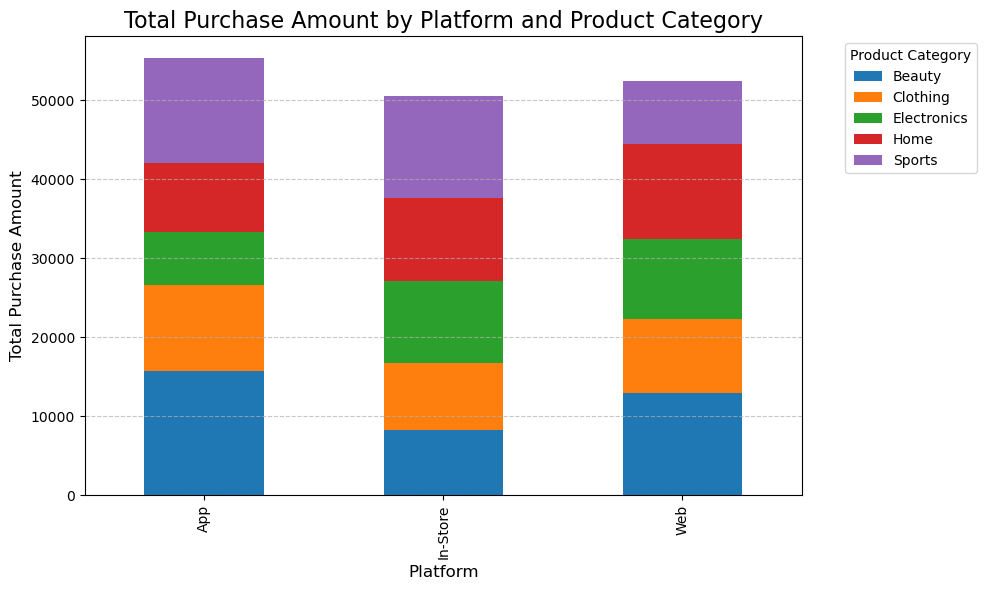

In [10]:
# 2c. Create a stacked bar chart to visualize the total Purchase_Amount for each platform, with bars segmented by Product_Category.

import matplotlib.pyplot as plt

# Plot stacked bar chart
platform_category.plot(kind='bar', stacked=True, figsize=(10, 6))  # using pandas.plot()

# Add labels and formatting
plt.title('Total Purchase Amount by Platform and Product Category', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total Purchase Amount', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Data Preparation for Market Basket Analysis:

Question 3: 

Prepare the dataset for Market Basket Analysis (MBA) by creating a transaction-product matrix.

***[Hint: Transform the dataset such that each row represents a unique TransactionID, and each column represents a Product_Category. The value in the matrix should be 1 if the product was purchased in the transaction and 0 otherwise.]***

Save the prepared dataset as a dataframe, named mba_prepared_df.
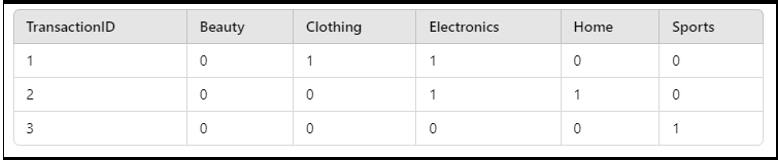


In [15]:
# 3. Market Basket Analysis (MBA) by creating a transaction-product matrix
mba_prepared_df = pd.crosstab(customers_df['TransactionID'], customers_df['Product_Category'])
mba_prepared_df

Product_Category,Beauty,Clothing,Electronics,Home,Sports
TransactionID,,,,,
1,0,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
...,...,...,...,...,...
596,0,0,0,0,1
597,0,0,0,0,1
598,0,0,1,0,0


**Usage of Market Basket Analysis (MBA):** 

**Market Basket Analysis (MBA)** is valuable for business strategy.

---

* It highlights meaningful insights, like:

  > "Customers who buy *bread* and *butter* often buy *jam*"

---

### a) **Generate Business Recommendations**

MBA helps the business with **targeted actions** in these areas:

#### 🔹 **Product Placement**

* **Cross-merchandising**: Place products often bought together near each other

  * E.g., Chips next to salsa or wine near cheese
* Improve **store layout** (physical or digital) for higher conversion

#### 🔹 **Bundling and Promotions**

* Design **combo deals** or **discounts** on frequently co-purchased items

  * E.g., "Buy 2, get 1 free" for items usually bought together

#### 🔹 **Personalized Marketing**

* **Recommend** associated items to customers based on past purchases

  * E.g., like Amazon's “Frequently Bought Together”
* Launch **targeted campaigns** (email or app) promoting these bundles

#### 🔹 **Inventory Management**

* Stock frequently associated items together to reduce **stockouts**
* Forecast demand more accurately based on **co-purchase behavior**

#### 🔹 **Customer Segmentation**

* Combine MBA with customer segments:

  * e.g., “Younger shoppers buy A and B together more than older ones”
* Tailor marketing by **demographics, time of year, or region**

---

### b) **Communicate Insights to Stakeholders**

* Clear business implications
* Collaborate with teams like:

  * **Marketing** (for campaigns)
  * **Sales/Store Ops** (for layout/bundling)
  * **Supply Chain** (for stocking decisions)

---


### **Data Analysis**

Question 4: 

### Perform RFM analysis and Customer Segmentation:

- **4a. Calculate Recency:**
For each customer, calculate the number of days between the most recent transaction and the latest date in the dataset: "2024-08-22".

- **4b. Calculate Frequency:**
For each customer, count the total number of transactions.

- **4c. Calculate Monetary:**
For each customer, calculate the total Purchase_Amount.

- **4d. Customer Segmentation:** Rank customers into High, Moderate, and Low Priority segments:

    - **High Priority:** Top 25% in Monetary and Frequency, and Recency in the bottom 25% (most recent purchases).

    - **Moderate Priority:** Middle 50% in all three metrics.

    - **Low Priority:** Bottom 25% in Monetary and Frequency, and Recency in the top 25% (least recent purchases).


In [24]:
# 4a. Calculate Recency
latest_date = pd.Timestamp("2024-08-22") # setting a reference date
cleaned_df['Purchase_Date'] = pd.to_datetime(cleaned_df['Purchase_Date'], errors='coerce')
recency = cleaned_df.groupby('CustomerID')['Purchase_Date'].max().apply(lambda x: (latest_date - x).days)

# 4b. Calculate Frequency
frequency = cleaned_df.groupby('CustomerID')['TransactionID'].count()

# 4c. Calculate Monetary
monetary = cleaned_df.groupby('CustomerID')['Purchase_Amount'].sum()

# Combine RFM metrics
rfm = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})
rfm

,Recency,Frequency,Monetary
CustomerID,,,
CUST1000,467,1,421.220000
CUST1001,267,2,872.490000
CUST1002,120,2,322.790000
CUST1004,11,3,954.520000
CUST1005,373,2,723.100000
...,...,...,...
CUST1295,164,4,1253.198224
CUST1296,99,3,286.820000
CUST1297,259,3,885.620476


In [25]:
# 4d. Customer segmentation: Rank customers into High, Moderate, and Low Priority segments

# Step 1: Compute thresholds
r_25 = rfm['Recency'].quantile(0.25)
r_75 = rfm['Recency'].quantile(0.75)
f_25 = rfm['Frequency'].quantile(0.25)
f_75 = rfm['Frequency'].quantile(0.75)
m_25 = rfm['Monetary'].quantile(0.25)
m_75 = rfm['Monetary'].quantile(0.75)

In [26]:
# Step 2: Define a function to label each customer
def assign_rfm_segment(row):
    if (
        row['Recency'] <= r_25 and
        row['Frequency'] >= f_75 and
        row['Monetary'] >= m_75
    ):
        return 'High Priority'
    
    elif (
        row['Recency'] >= r_75 and
        row['Frequency'] <= f_25 and
        row['Monetary'] <= m_25
    ):
        return 'Low Priority'
    
    else:
        return 'Moderate Priority'

In [27]:
# Step 3: Apply the function to your RFM DataFrame
rfm['RFM Segment'] = rfm.apply(assign_rfm_segment, axis=1)
rfm

,Recency,Frequency,Monetary,RFM Segment
CustomerID,,,,
CUST1000,467,1,421.220000,Moderate Priority
CUST1001,267,2,872.490000,Moderate Priority
CUST1002,120,2,322.790000,Moderate Priority
CUST1004,11,3,954.520000,High Priority
CUST1005,373,2,723.100000,Moderate Priority
...,...,...,...,...
CUST1295,164,4,1253.198224,Moderate Priority
CUST1296,99,3,286.820000,Moderate Priority
CUST1297,259,3,885.620476,Moderate Priority


**Usage of RFM analysis:** 

**RFM Analysis** is a simple but powerful marketing technique used to understand customer behavior and segment customers based on how they interact with your business.

---

## 🔍 What does **RFM** stand for?

| Letter | Meaning       | What it tells you                           |
| ------ | ------------- | ------------------------------------------- |
| **R**  | **Recency**   | How **recently** a customer made a purchase |
| **F**  | **Frequency** | How **often** they purchase                 |
| **M**  | **Monetary**  | How much **money** they've spent in total   |

---

## 🧠 Why use RFM?

RFM helps you answer:

* Who are my **best customers**?
* Who are **at risk** of leaving?
* Who are **new customers**?
* Who buys **frequently but spends little**?

This allows you to:

* Target marketing campaigns more effectively
* Improve customer retention
* Upsell or cross-sell to the right segments

## 🛠️ How is RFM calculated?

1. **Recency** = Days since last purchase (lower = better)
2. **Frequency** = Number of purchases (higher = better)
3. **Monetary** = Total spending (higher = better)
